In [ ]:
!pip install kagglehub 

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pypiahmad/realistic-action-recognition-ucf50")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\91772\.cache\kagglehub\datasets\pypiahmad\realistic-action-recognition-ucf50\versions\1


In [ ]:
!pip install moviepy yt-dlp

In [ ]:
!pip install opencv-python tensorflow numpy pandas matplotlib scikit-learn seaborn

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import tensorflow as tf

In [13]:
seed_contant = 27
np.random.seed(seed_contant)
random.seed(seed_contant)
tf.random.set_seed(seed_contant)

dataset_path = r"C:\Users\91772\.cache\kagglehub\datasets\pypiahmad\realistic-action-recognition-ucf50\versions\1\UCF50"

all_classes = os.listdir(dataset_path)
print(all_classes)

['BaseballPitch', 'Basketball', 'BenchPress', 'Biking', 'Billiards', 'BreastStroke', 'CleanAndJerk', 'Diving', 'Drumming', 'Fencing', 'GolfSwing', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'JavelinThrow', 'JugglingBalls', 'JumpingJack', 'JumpRope', 'Kayaking', 'Lunges', 'MilitaryParade', 'Mixing', 'Nunchucks', 'PizzaTossing', 'PlayingGuitar', 'PlayingPiano', 'PlayingTabla', 'PlayingViolin', 'PoleVault', 'PommelHorse', 'PullUps', 'Punch', 'PushUps', 'RockClimbingIndoor', 'RopeClimbing', 'Rowing', 'SalsaSpin', 'SkateBoarding', 'Skiing', 'Skijet', 'SoccerJuggling', 'Swing', 'TaiChi', 'TennisSwing', 'ThrowDiscus', 'TrampolineJumping', 'VolleyballSpiking', 'WalkingWithDog', 'YoYo']


In [49]:
plt.figure(figsize=(20, 20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [51]:
max_classes = 20

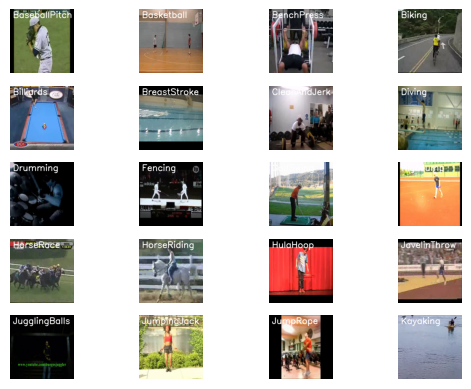

In [53]:
# Loop for getting a frame from the classes
for counter, select_class_name in enumerate(all_classes[:max_classes], 1):
    # Get video files from the class directory
    class_path = os.path.join(dataset_path, select_class_name)
    video_files_names_list = os.listdir(class_path)

    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)
    video_path = os.path.join(class_path, selected_video_file_name)

    # Reading the video
    video_reader = cv2.VideoCapture(video_path)
    success, bgr_frame = video_reader.read()  # Read the first frame
    video_reader.release()

    #if fail then error
    if not success:
        print(f"Failed to read video: {video_path}")
        continue

    # Resizing and converting to RGB
    bgr_frame = cv2.resize(bgr_frame, (224, 224))
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Addint the text overlay
    cv2.putText(rgb_frame, select_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Plot the frame
    plt.subplot(5,4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [55]:
# Adjusting layout and showing the plot
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [63]:
#Taking sequence_length as the no of frame from the the video
sequence_length = 20
IMAGE_HEIGHT,IMAGE_WIDTH = 64,64

In [109]:
my_classes = ['PushUps', 'PlayingGuitar', 'HighJump', 'RopeClimbing', 'PullUps', 'Kayaking']
#funtion for the extraction the frames
def frames_extraction(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames = max(int(video_frames_count/sequence_length), 1)
    for frame_counter in range(sequence_length):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames)
        succes, frame = video_reader.read()
        if not succes:
            break
        resize_frame = cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
        normalised_frame = resize_frame / 255.0
        frames_list.append(normalised_frame)
    video_reader.release()

    return frames_list

In [111]:
#funtion to iterate through all the classes, it will return frames(features) ,  labels , video_path
def process_videos():

    features = []
    labels = []
    video_paths = []
    for idx , class_name in enumerate(my_classes):
        class_path = os.path.join(dataset_path, class_name)
        video_files_names_list = os.listdir(class_path)
        print(f'Extracting Data of Class: {class_name}')
        for file in video_files_names_list:
            video_path = os.path.join(class_path, file)
            frames = frames_extraction(video_path)


            if len(frames) == sequence_length:
                features.append(frames)
                labels.append(idx)
                video_paths.append(video_path)
    features = np.asarray(features)
    labels = np.array(labels)

    return features , labels , video_paths

In [113]:
my_features , my_labels , my_video_paths = process_videos()
print("Final features shape:", my_features.shape)
print("Final labels shape:", my_labels.shape)
print("Total videos processed:", len(my_video_paths))

Extracting Data of Class: PushUps
Extracting Data of Class: PlayingGuitar
Extracting Data of Class: HighJump
Extracting Data of Class: RopeClimbing
Extracting Data of Class: PullUps
Extracting Data of Class: Kayaking
Final features shape: (796, 20, 64, 64, 3)
Final labels shape: (796,)
Total videos processed: 796


In [114]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False)
# labels_reshaped = np.array(my_labels).reshape(-1, 1)
# Y = encoder.fit_transform(labels_reshaped)
# Y
import keras
one_hot_encoded_labels=keras.utils.to_categorical(my_labels)

In [115]:
# # X = np.zeros((len(my_features), 20, 224, 224, 3), dtype=np.float16)

# # for i, feature_list in enumerate(my_features):
# #     for j, feature in enumerate(feature_list):
# #         resized = cv2.resize(feature, (224, 224)).astype(np.float16)
# #         X[i, j] = resized

# # X=np.array(my_features,dtype=np.float16)

# # # Normalize
# # mean = np.mean(X)
# # std = np.std(X)
# # X = (X - mean) / std

# # X = np.array(my_features)  # Default: float64 or float32 depending on input

# # mean = np.mean(X)
# # std = np.std(X)
# # X = (X - mean) / std

# # X = X.astype(np.float16)  # Finally convert to float16 to save RAM

# X = np.array(my_features, dtype=np.float16)  # Immediately reduce memory usage
# mean = np.mean(X, dtype=np.float32)  # Calculate using higher precision
# std = np.std(X, dtype=np.float32)

# X = (X - mean) / std


In [116]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test = train_test_split(my_features, one_hot_encoded_labels,
                                                                         test_size=0.25,shuffle=True,
                                                                         random_state=seed_contant)

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, TimeDistributed, Dropout, Flatten, Dense, Conv2D, LSTM
def create_LRCN_model():
    # We will use a Sequential model for model construction.
    model = Sequential()

    # Define the Model Architecture.

    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (sequence_length, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))


    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(my_classes), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()

    # Return the constructed LRCN model.
    return model

In [118]:
# Now we will utilize the function create_LRCN_model() created above to construct the required LRCN model
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()
print("Model Created Successfully!")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_12                  │ (None, 20, 64, 64, 16)      │             448 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_13                  │ (None, 20, 16, 16, 16)      │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_14                  │ (None, 20, 16, 16, 16)      │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_15                  │ (None, 20, 16, 16, 32)      │           4,640 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_16                  │ (None, 20, 4, 4, 32)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_17                  │ (None, 20, 4, 4, 32)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_18                  │ (None, 20, 4, 4, 64)        │          18,496 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_19                  │ (None, 20, 2, 2, 64)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_20                  │ (None, 20, 2, 2, 64)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_21                  │ (None, 20, 2, 2, 64)        │          36,928 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_22                  │ (None, 20, 1, 1, 64)        │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_23                  │ (None, 20, 64)              │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,126 (285.65 KB)

 Trainable params: 73,126 (285.65 KB)

 Non-trainable params: 0 (0.00 B)

Model Created Successfully!


In [119]:
import pydot
from keras.utils import plot_model
plot_model(LRCN_model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [ ]:
# y_train_raw = np.argmax(y_train, axis=1)

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 4,shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])


Epoch 1/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 50s 192ms/step - accuracy: 0.1828 - loss: 1.8055 - val_accuracy: 0.2167 - val_loss: 1.7823
Epoch 2/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.2074 - loss: 1.7816 - val_accuracy: 0.3333 - val_loss: 1.7443
Epoch 3/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.2813 - loss: 1.6890 - val_accuracy: 0.3917 - val_loss: 1.6715
Epoch 4/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.3048 - loss: 1.6224 - val_accuracy: 0.5167 - val_loss: 1.3599
Epoch 5/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.4782 - loss: 1.3630 - val_accuracy: 0.4917 - val_loss: 1.3049
Epoch 6/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - accuracy: 0.5156 - loss: 1.2176 - val_accuracy: 0.5667 - val_loss: 1.1160
Epoch 7/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.6370 - loss: 1.0172 - val_accuracy: 0.6083 - val_loss: 1.0580
Epoch 8/70
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.6884 - loss: 0

In [129]:
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9222 - loss: 0.3183


In [131]:
# Geting the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history


In [133]:
print(model_evaluation_loss)
print(model_evaluation_accuracy)


0.36956387758255005
0.9045225977897644


In [135]:
# Import required library
import datetime as dt

# Define the date-time format
date_time_format = '%Y_%m_%d_%H_%M_%S'

# Get the current datetime
curr_date_time_dt = dt.datetime.now()

# Format the datetime to string
curr_date_time_string = dt.datetime.strftime(curr_date_time_dt, date_time_format)

# Generate the model file name
model_file_name = f'LRCN_MODEL_Date_Time_{curr_date_time_string}_Loss_{model_evaluation_loss:.3f}_Accuracy_{model_evaluation_accuracy:.3f}.keras'

# Save the model
LRCN_model.save(model_file_name)


In [137]:
def plot_metric(model_training_history, metric_name1, metric_name2,plot_name):
    metric_value1 = model_training_history.history[metric_name1]
    metric_value2 = model_training_history.history[metric_name2]
    epochs = range(len(metric_value1))

    plt.plot(epochs, metric_value1, 'blue', label='Training')
    plt.plot(epochs, metric_value2, 'red', label='Validation')
    plt.title(str(plot_name))
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel(metric_name1)
    plt.grid(True)
    plt.show()

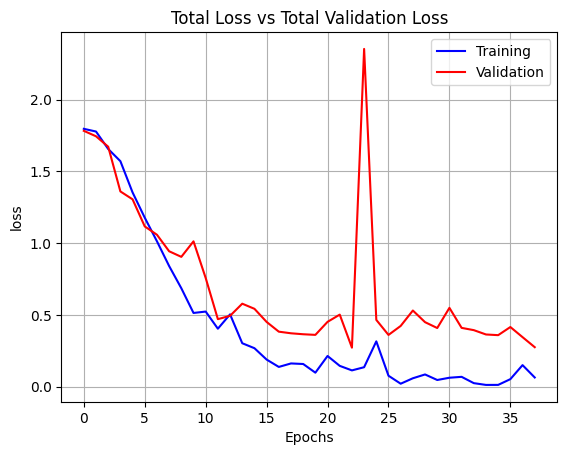

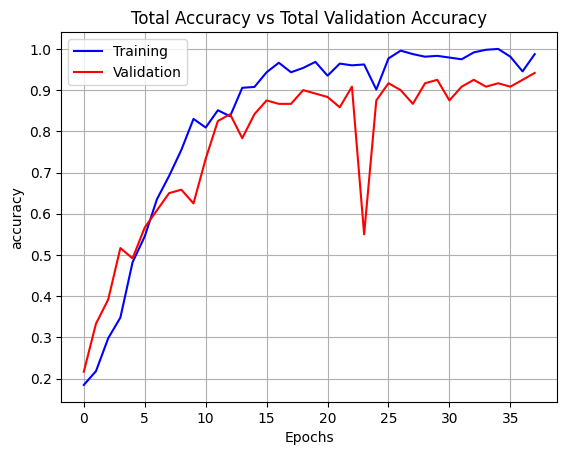

In [139]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')



In [141]:
import pickle
import numpy as np

# If X_train has shape (num_samples, 25, 112, 112, 3)
mean = np.mean(features_train, axis=0)
std = np.std(features_train, axis=0)

with open("mean.pkl", "wb") as f:
    pickle.dump(mean, f)

with open("std_array.pkl", "wb") as f:
    pickle.dump(std, f)

In [143]:
my_classes = ['PushUps', 'PlayingGuitar', 'HighJump', 'RopeClimbing', 'PullUps', 'Kayaking']

with open("class_list1.pkl", "wb") as f:
    pickle.dump(my_classes, f)


In [ ]:
!pip install pydot graphviz

In [145]:
# Generate the requirements.txt file with all installed packages
!pip freeze > requirements.txt

# Display the contents of requirements.txt
!cat requirements.txt

absl-py==2.1.0
aext-assistant @ file:///C:/b/abs_98xvdek9qa/croot/aext-assistant_1734644152369/work
aext-assistant-server @ file:///C:/b/abs_93twy7n40b/croot/aext-assistant-server_1734640405857/work
aext-core @ file:///C:/b/abs_73k82brgp5/croot/aext-core_1734637800697/work
aext-core-server @ file:///C:/b/abs_e3xgm257mx/croot/aext-core-server_1734635079146/work
aext-panels @ file:///C:/b/abs_e40tdjfcpq/croot/aext-panels_1734643464834/work
aext-panels-server @ file:///C:/b/abs_546lo5c36i/croot/aext-panels-server_1734640142498/work
aext-project-filebrowser-server @ file:///C:/b/abs_11ixe7hbzm/croot/aext-project-filebrowser-server_1734687629540/work/backend_lib/project_filebrowser
aext-share-notebook @ file:///C:/b/abs_fewa44_d8o/croot/aext-share-notebook_1734642886563/work
aext-share-notebook-server @ file:///C:/b/abs_3dkdp713ad/croot/aext-share-notebook-server_1734639662890/work
aext-shared @ file:///C:/b/abs_6bq_wjfbhn/croot/aext-shared_1734628822229/work
aext-toolbox @ file:///C:/b/abs

In [149]:
import tensorflow as tf
from IPython.display import Video
from moviepy import VideoFileClip
from collections import deque
from tensorflow.keras.models import load_model

In [55]:
!pip install yt_dlp opencv-python-headless

   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   - -------------------------------------- 1.3/39.4 MB 9.6 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/39.4 MB 12.0 MB/s eta 0:00:03
   ----- ---------------------------------- 5.5/39.4 MB 9.9 MB/s eta 0:00:04
   ------ --------------------------------- 6.6/39.4 MB 8.6 MB/s eta 0:00:04
   ------- -------------------------------- 7.3/39.4 MB 7.9 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/39.4 MB 7.5 MB/s eta 0:00:05
   -------- ------------------------------- 8.7/39.4 MB 6.5 MB/s eta 0:00:05
   --------- ------------------------------ 9.2/39.4 MB 5.5 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/39.4 MB 5.2 MB/s eta 0:00:06
   --------- ------------------------------ 9.7/39.4 MB 4.9 MB/s eta 0:00:07
   ---------- ----------------------------- 10.2/39.4 MB 4.5 MB/s eta 0:00:07
   ---------- ----------------------------- 10.5/39.4 MB 4.3 MB/s eta 0:00:07
   

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\91772\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [151]:
import cv2
import numpy as np
import os
import pickle
from keras.models import load_model
from collections import deque
import yt_dlp

# Load your trained model and preprocessing data
model = load_model('LRCN_MODEL_Date_Time_2025_07_07_14_05_42_Loss_0.370_Accuracy_0.905.keras')


In [153]:
with open("mean.pkl", "rb") as f:
    mean = pickle.load(f)
with open("std_array.pkl", "rb") as f:
    std = pickle.load(f)
with open("class_list1.pkl", "rb") as f:
    encoder1 = pickle.load(f)


In [175]:
pip install yt-dlp

Note: you may need to restart the kernel to use updated packages.


In [203]:
import os
import yt_dlp

def download_youtube_video(youtube_video_url, output_directory):
    os.makedirs(output_directory, exist_ok=True)

    ydl_opts = {
        'outtmpl': f'{output_directory}/%(title)s.%(ext)s',  # Save as title.mp4
        'format': 'best',
        'quiet': True,
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(youtube_video_url, download=True)
        title = info.get('title')
        return f"{output_directory}/{title}.mp4"

# Test it
# video_path = download_youtube_video(
#     'https://youtu.be/YVi8tlbOTCU?feature=shared',
#     'test_videos'
# )
# print("Downloaded to:", video_path)
#Downloaded to: test_videos/41 pull ups.mp4               


Downloaded to: test_videos/41 pull ups.mp4               


In [195]:
# def download_youtube_videos(youtube_video_url,output_directory):
#     video=pafy.new(youtube_video_url)
#     title=video.title
#     video_best=video.getbest()
#     output_file_path=f'{output_directory}/{title}.mp4'
#     video_best.download(filepath=output_file_path,quiet=True)
#     return title

In [ ]:
# test_videos_directory='test_videos'
# os.makedirs(test_videos_directory,exist_ok=True)
# video_title=download_youtube_videos('https://youtu.be/YVi8tlbOTCU?feature=shared',test_videos_directory)
# input_video_file_path=f'{test_videos_directory}/{video_title}.mp4'

In [222]:
# def predict_on_video(video_file_path,output_file_path,SEQUENCE_LENGTH):
#     video_reader = cv2.VideoCapture(video_file_path)
#     original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
#     original_video_height= int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
#     video_writer=cv2.VideoWriter(output_file_path,cv2.VideoWriter_fourcc('M','P','4','V'),
#                                 video_reader.get(cv2.CAP_PROP_FPS),(original_video_width,original_video_height))
#     frames_queue = deque(maxlen=SEQUENCE_LENGTH)
#     predicted_class_name=''
#     while video_reader.isOpened():
#         ok,frame=video_reader.read()
#         if not ok:
#             break
#         resized_frame = cv2.resize(frame,(IMAGE_HEIGHT,IMAGE_WIDTH))
#         normalized_frame=resized_frame/255
#         frames_queue.append(normalized_frame)
#         if len(frames_queue) == SEQUENCE_LENGTH:
#             predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_queue,axis=0))[0]
#             predicted_label=np.argmax(predicted_labels_probabilities)
#             predicted_class_name=my_classes[predicted_label]
#         cv2.putText(frame,predicted_class_name,(10,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
#         video_writer.write(frame)
#     video_reader.release()
#     video_writer.release()
        

In [ ]:
# video_title = os.path.splitext(os.path.basename(video_path))[0]
# output_video_file_path = f'{test_videos_directory}/{video_title}-Output-SeqLen{sequence_length}.mp4'
# predict_on_video(video_path,output_video_file_path,sequence_length)
# VideoFileClip(output_video_file_path,audio=False,target_resolution=(300,None)).ipython_display()

In [224]:
def predict_single_action(video_file_path, SEQUENCE_LENGTH=20):

    # Load the class list (manual mapping)
    with open("class_list1.pkl", "rb") as f:
        my_classes = pickle.load(f)

    cap = cv2.VideoCapture(video_file_path)
    frames_list = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    org_video_width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    org_video_height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    predicted_class_name=''
    skip = max(total_frames // SEQUENCE_LENGTH, 1)

    for i in range(SEQUENCE_LENGTH):
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * skip)
        ret, frame = cap.read()
        if not ret:
            break
        resized = cv2.resize(frame, (64, 64))
        normalized = resized / 255.0
        frames_list.append(normalized)
        
    if len(frames_list) != SEQUENCE_LENGTH:
        print("Not enough frames.")
        return
    predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_list,axis=0))[0]
    predicted_label=np.argmax(predicted_labels_probabilities)
    predicted_class_name= my_classes[predicted_label]
    print(f'Action Predicted: {predicted_class_name}\n Confidence:{predicted_labels_probabilities[predicted_label]}')
    cap.release()


In [246]:
youtube_url = "https://www.youtube.com/shorts/yCVYjsKTQIs?feature=share"
input_video_path = download_youtube_video(youtube_url,'test_videos')
print("Downloaded:", input_video_path)
predict_single_action(input_video_path)

Downloaded: test_videos/Women’s High Jump Final 2024 #trackandfield #jd_films2309 #womenshighjump #highjump #athletics #girl.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Action Predicted: HighJump
 Confidence:0.8708219528198242


In [230]:
youtube_url = "https://youtu.be/YVi8tlbOTCU?feature=shared"
input_video_path = download_youtube_video(youtube_url,'test_videos')
print("Downloaded:", input_video_path)
predict_single_action(input_video_path)

Downloaded: test_videos/41 pull ups.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Action Predicted: PullUps
 Confidence:0.9889469742774963


In [252]:
youtube_url = "https://www.youtube.com/shorts/jRFQVmBvwJY"
input_video_path = download_youtube_video(youtube_url,'test_videos')
print("Downloaded:", input_video_path)
predict_single_action(input_video_path)

Downloaded: test_videos/Rope climb descent like THIS!!.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Action Predicted: PushUps
 Confidence:0.678070604801178


In [236]:
youtube_url = "https://www.youtube.com/shorts/yQEx9OC2C3E?feature=share"
input_video_path = download_youtube_video(youtube_url,'test_videos')
print("Downloaded:", input_video_path)
predict_single_action(input_video_path)

Downloaded: test_videos/Push-Up Mistake (SAVE YOUR SHOULDERS!).mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Action Predicted: PushUps
 Confidence:0.7690413594245911


In [238]:
youtube_url = "https://www.youtube.com/shorts/f05tGz5pNMo?feature=share"
input_video_path = download_youtube_video(youtube_url,'test_videos')
print("Downloaded:", input_video_path)
predict_single_action(input_video_path)

Downloaded: test_videos/Saanson ki mala #guitar #rahatfatehalikhan.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Action Predicted: PlayingGuitar
 Confidence:0.9737098813056946


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step


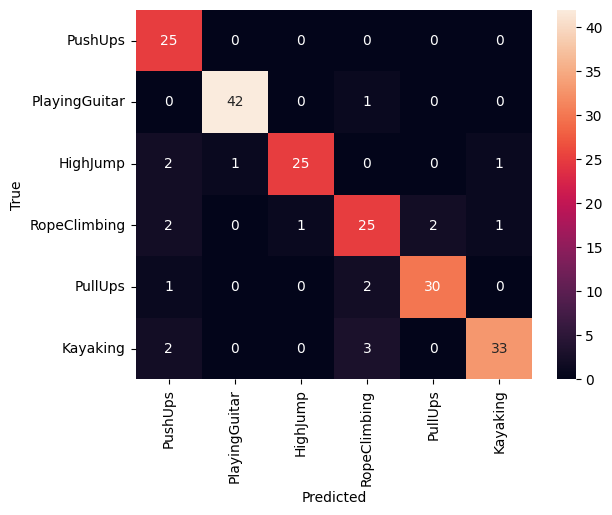

In [234]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_true = np.argmax(labels_test, axis=1)
y_pred = np.argmax(LRCN_model.predict(features_test), axis=1)

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, xticklabels=my_classes, yticklabels=my_classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [155]:
# def download_youtube_video(youtube_video_url, output_directory='videos'):
#     import os
#     import yt_dlp
#     import uuid

#     os.makedirs(output_directory, exist_ok=True)
#     new_filename = str(uuid.uuid4())

#     ydl_opts = {
#         'format': 'mp4',  # avoids merging error
#         'outtmpl': f'{output_directory}/{new_filename}.%(ext)s',
#     }

#     with yt_dlp.YoutubeDL(ydl_opts) as ydl:
#         info_dict = ydl.extract_info(youtube_video_url, download=True)
#         ext = info_dict.get('ext', 'mp4')
#         return os.path.join(output_directory, f"{new_filename}.{ext}"), new_filename
